# Descriptive statistics

- get overall info about participants
- assess normality of response times (RTs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import os

alpha = 0.05

d = pd.read_csv(os.path.join("..", "data", "serial-data.csv"), index_col=0)
agg = pd.read_csv(os.path.join("..", "data", "aggregated-data.csv"), index_col=0)

print("Loading:", len(d), "lines", len(d["ParticipantID"].unique()), "participants")

Loading: 22080 lines 240 participants


## Overall info about participants

In [2]:
TPP = 20  # there are 20 trials in practice
TPM = 72  # there are 72 trials in main part
TPL = 20  # there are 20 trials in a lexical test


print("Number of participants:")
display(pd.DataFrame(d["StudyID"].value_counts() / (TPP + TPM)))

print()
print()
print("Different kinds of designers:")

display(pd.DataFrame(d.groupby("StudyID")["Training"].value_counts() / (TPP + TPM)))

Number of participants:


,StudyID
Main,216.0
Pilot,24.0




Different kinds of designers:


Training
StudyID Training                  
Main    Non-designer         117.0
        Graphic designer      43.0
        Letter designer       31.0
        Other designer        20.0
        Typographer            5.0
Pilot   Non-designer          16.0
        Letter designer        6.0
        Typographer            2.0

# Assess normality of RTs

The distributions of RTs are not normal, but close enough.

Normality test for RT


,W,pval,normal
RT,0.758259,2.864082e-31,False


Normality test for RT (normalized)


,W,pval,normal
RT (normalized),0.996553,0.11782,True


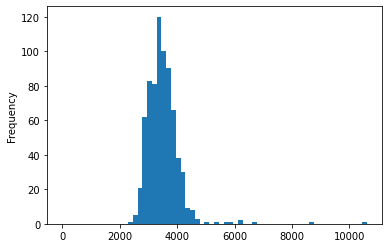

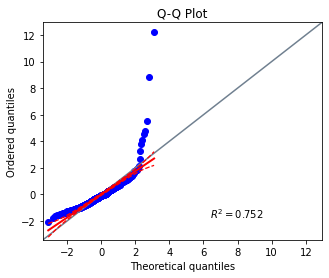

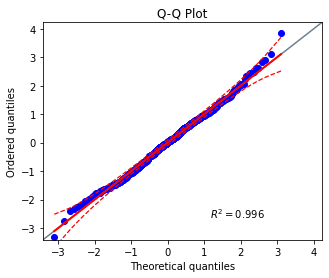

In [3]:
# assess normality of RTs
for col in ["RT", "RT (normalized)"]:
    rts = agg[col]
    rts.plot.hist(bins=50, sharey=True)
    
# test for normality
# null hypothesis: RTs come from a normal distribution
for col in ["RT", "RT (normalized)"]:
    print("Normality test for %s" % col)
    display(pg.normality(agg[col]))

# Q-Q plots
for col in ["RT", "RT (normalized)"]:
    pg.qqplot(agg[col], dist="norm")

,ParticipantID,Composite pair,Congruent pair,TestID,TrialID,Training,isDesigner,Correct,Correct (normalized),ET,RT,RT (normalized),Date,AUC,AUC (normalized),Type,Focus
StudyID,,,,,,,,,,,,,,,,,
Main,0,False,True,1,24,Graphic designer,True,0.958333,3.010693,305.600000,2621.208333,7.869233,2022-06-16 07:57:35,1.000000,3.141593,Normal,Other design
Main,0,True,False,1,24,Graphic designer,True,0.666667,2.094395,305.600000,2866.583333,7.954646,2022-06-16 07:57:35,0.770833,2.143215,Composite incongruent,Other design
Main,0,True,True,1,24,Graphic designer,True,0.750000,2.356194,305.600000,2938.458333,7.968271,2022-06-16 07:57:35,0.802083,2.219516,Composite congruent,Other design
Main,1,False,True,1,24,Graphic designer,True,0.791667,2.487094,227.800000,2702.333333,7.886799,2022-06-16 04:46:08,0.791667,2.193623,Normal,Other design
Main,1,True,False,1,24,Graphic designer,True,0.541667,1.701696,227.800000,2665.541667,7.861038,2022-06-16 04:46:08,0.541667,1.654226,Composite incongruent,Other design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pilot,238,True,False,1,22,Non-designer,False,0.818182,2.570394,543.636364,2850.863636,7.948938,2022-05-23 18:01:23,NaN,NaN,Composite incongruent,None
Pilot,238,True,True,1,2,Non-designer,False,0.500000,1.570796,543.636364,2985.000000,7.996744,2022-05-23 18:01:23,NaN,NaN,Composite congruent,None
Pilot,239,False,False,1,9,Letter designer,True,0.777778,2.443461,568.181818,2934.333333,7.978502,2022-05-22 08:00:19,NaN,NaN,Normal,Letters


/var/folders/73/df1srj11131_3t4kwjv082_40000gn/T/ipykernel_57921/1945890159.py:30: FutureWarning: ['Date', 'Focus'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  auc = agg.groupby(["Training", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]


mean       std
Training         Type                                     
Graphic designer Composite congruent    2.158248  0.226166
                 Composite incongruent  2.075530  0.251788
                 Normal                 2.734183  0.284709
Letter designer  Composite congruent    2.287199  0.231560
                 Composite incongruent  2.212375  0.291697
                 Normal                 2.930948  0.272524
Non-designer     Composite congruent    2.059279  0.240167
                 Composite incongruent  1.892387  0.274825
                 Normal                 2.606279  0.340052
Other designer   Composite congruent    2.168068  0.196577
                 Composite incongruent  1.868145  0.406317
                 Normal                 2.743420  0.346763
Typographer      Composite congruent    2.158982  0.209475
                 Composite incongruent  2.298516  0.158425
                 Normal                 2.978743  0.173271

/var/folders/73/df1srj11131_3t4kwjv082_40000gn/T/ipykernel_57921/1945890159.py:36: FutureWarning: ['Training', 'Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  auc = agg.groupby(["Focus", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]


mean       std
Focus        Type                                     
Letters      Composite congruent    2.269391  0.230211
             Composite incongruent  2.224339  0.276971
             Normal                 2.937586  0.259560
None         Composite congruent    2.059279  0.240167
             Composite incongruent  1.892387  0.274825
             Normal                 2.606279  0.340052
Other design Composite congruent    2.161365  0.215671
             Composite incongruent  2.009694  0.320950
             Normal                 2.737115  0.302951

<AxesSubplot:title={'center':'AUC (normalized)'}, xlabel='Focus,Type'>

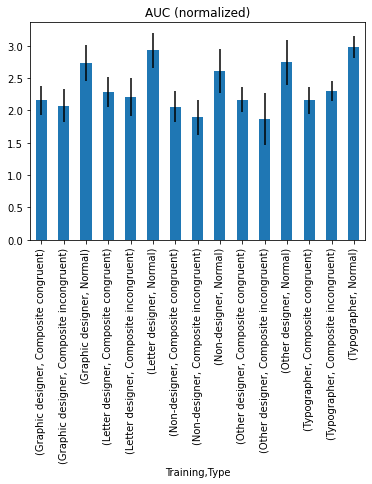

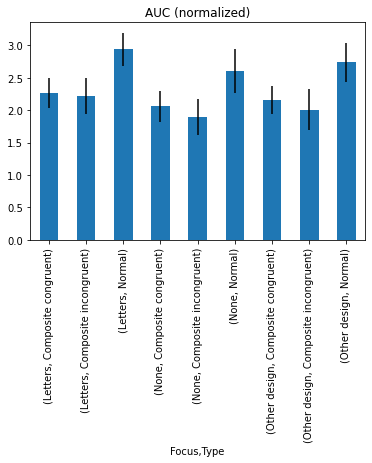

/Users/davidbrezina/.pyenv/versions/3.9.9/envs/data/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
from copy import copy
# from scipy.stats import sem

agg["Type"] = "Normal"
conditions = [
  agg["Composite pair"].eq(True) & agg["Congruent pair"].eq(True),
  agg["Composite pair"].eq(True) & agg["Congruent pair"].eq(False),
]
choices = [
  "Composite congruent",
  "Composite incongruent"
]
agg["Type"] = np.select(conditions, choices, default="Normal")
conditions = [
  agg["Training"].eq("Other designer"),
  agg["Training"].eq("Graphic designer"),
  agg["Training"].eq("Typographer"),
  agg["Training"].eq("Letter designer"),
]
choices = [
  "Other design",
  "Other design",
  "Letters",
  "Letters",
]
agg["Focus"] = np.select(conditions, choices, default="None")

display(agg)

auc = agg.groupby(["Training", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
auc.reset_index()
auc = auc["AUC (normalized)"]
display(auc)
auc.plot(kind="bar", stacked=False, y="mean", legend=False, yerr="std", title="AUC (normalized)")

auc = agg.groupby(["Focus", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
auc.reset_index()
auc = auc["AUC (normalized)"]
display(auc)
auc.plot(kind="bar", stacked=False, y="mean", legend=False, yerr="std", title="AUC (normalized)")
